<a href="https://colab.research.google.com/github/GillValenzuela/curso_data_science/blob/master/DS_Ingemat_Clase_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(path + "/Titanic-Dataset.csv")

In [5]:
df.groupby("Sex")["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [8]:
df.groupby(["Pclass","Sex"]).agg({"Survived":"sum"})

Survived
Pclass Sex             
1      female        91
       male          45
2      female        70
       male          17
3      female        72
       male          47

In [9]:
df.groupby(["Pclass","Sex"]).agg({"Survived":"count"})

Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.pivot_table(columns=["Sex",'Pclass'],values=["Survived","PassengerId"],aggfunc=["sum","count"])

sum                                      count                \
Sex         female                 male                female          male   
Pclass           1      2      3      1      2       3      1   2    3    1   
PassengerId  44106  33676  57561  55599  48380  158064     94  76  144  122   
Survived        91     70     72     45     17      47     94  76  144  122   

                       
Sex                    
Pclass         2    3  
PassengerId  108  347  
Survived     108  347

In [14]:
pd.crosstab(df["Sex"],df["Survived"],normalize="index")

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908

In [16]:
df.corr(numeric_only=True)

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [17]:
import seaborn as sns

<Axes: >

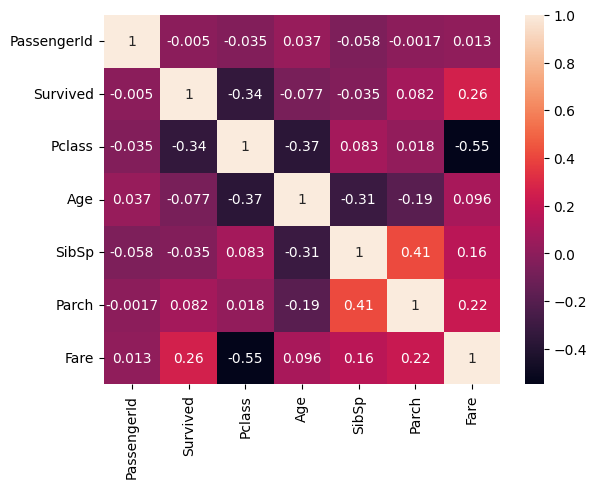

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [19]:
import matplotlib.pyplot as plt

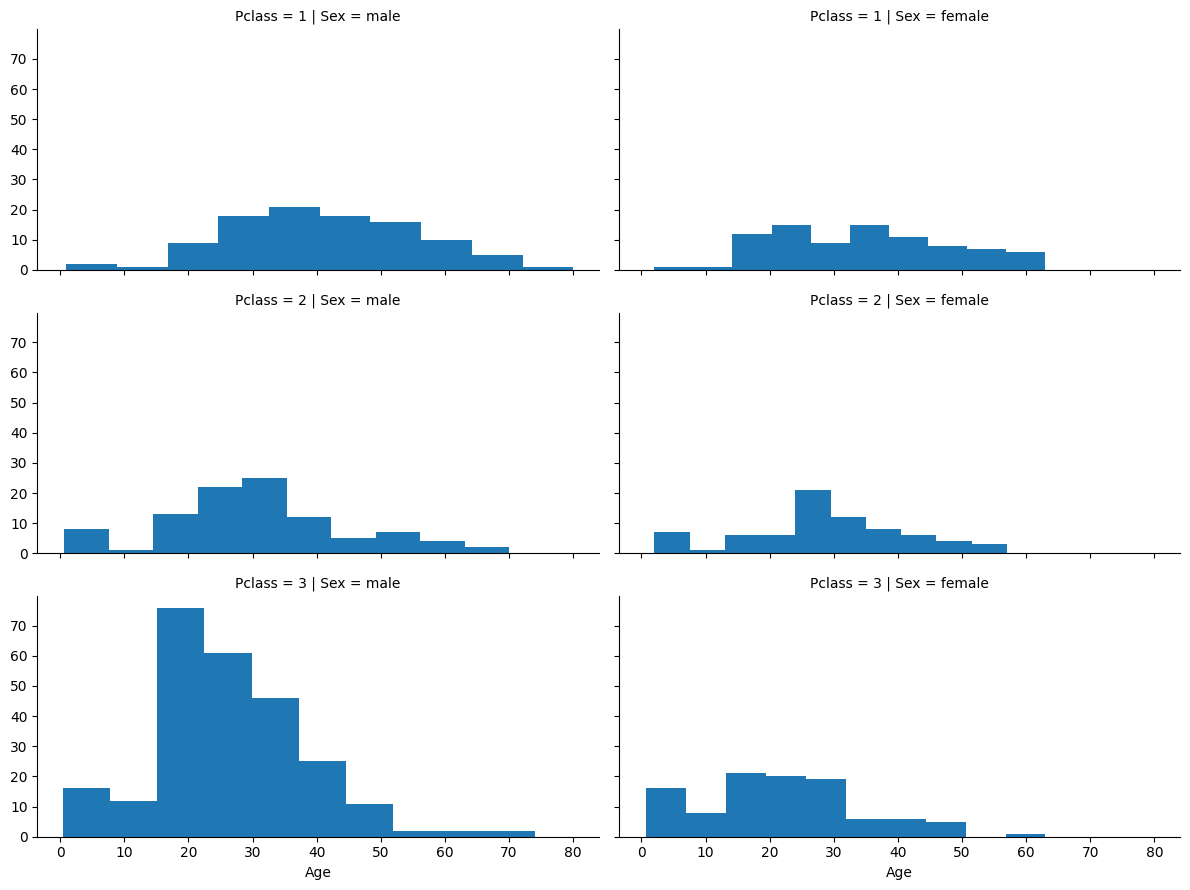

In [21]:
g = sns.FacetGrid(df, col="Sex", row="Pclass",aspect=2)
g.map(plt.hist, "Age", bins=10)

In [22]:
!pip install ydata-profiling sweetviz

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9780d54181fa577221c3dcb2f2d315b3d09f5960fd2167febe92bd5ad4a1a566
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [23]:
from ydata_profiling import ProfileReport

In [24]:
profile = ProfileReport(df, title="Profiling Report")

In [25]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 31.97it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |          | [  0%]   00:00 -> (? left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

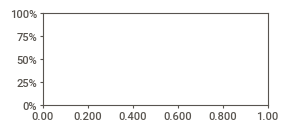

In [26]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [28]:
!pip install numpy==1.23.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.4 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.4 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.4 which is incompatible.
opencv-contrib-python 4.11.0.86 requires numpy>=1.23.5; python_version >= "3.11", but you have numpy 1.23.4 which is incompatible.
scipy 1.14.1 requires numpy<2.3,>=1.23.5, but you have numpy 1.23.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.4 which is incompatible.
xarray 2025.1.2 requires numpy>

In [8]:
import sweetviz as sv

my_report = sv.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



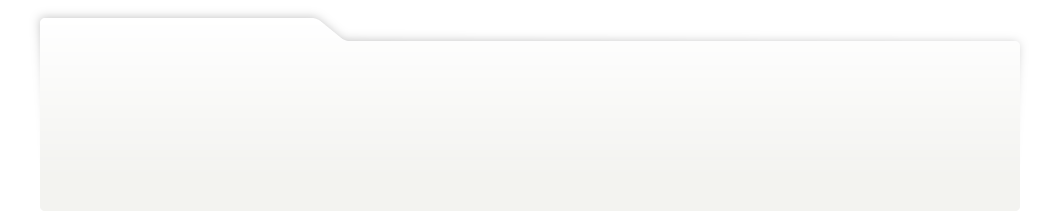
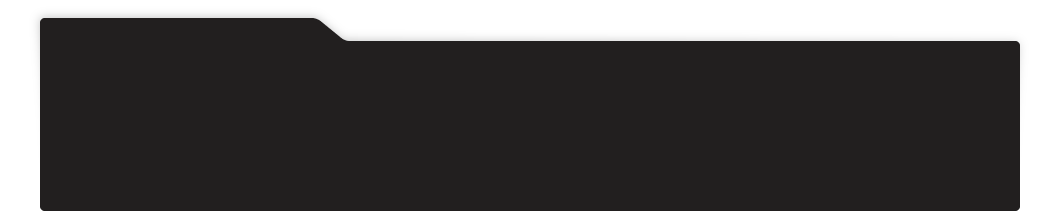
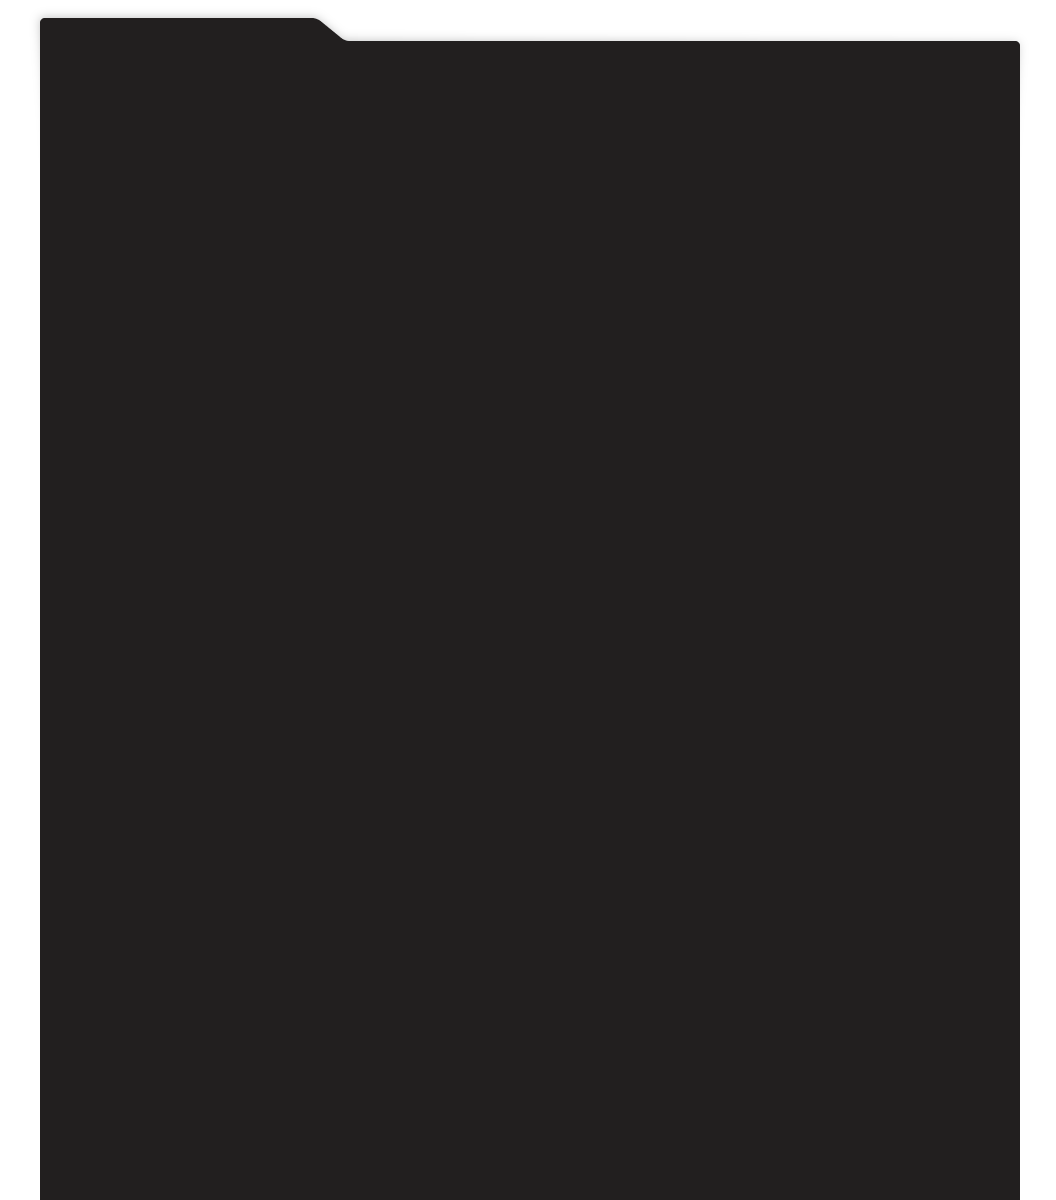
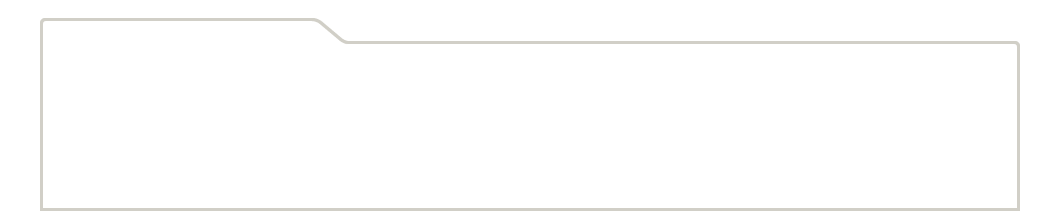
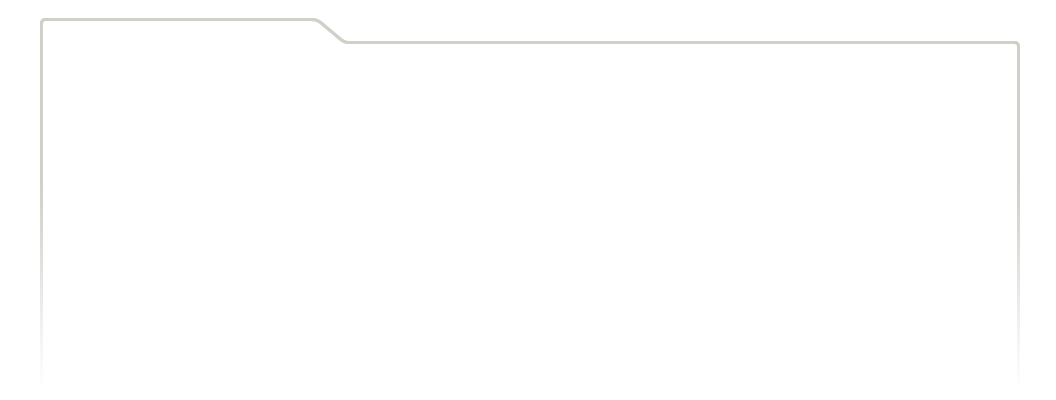
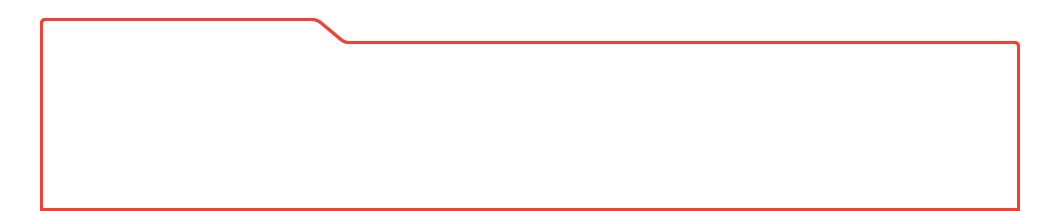
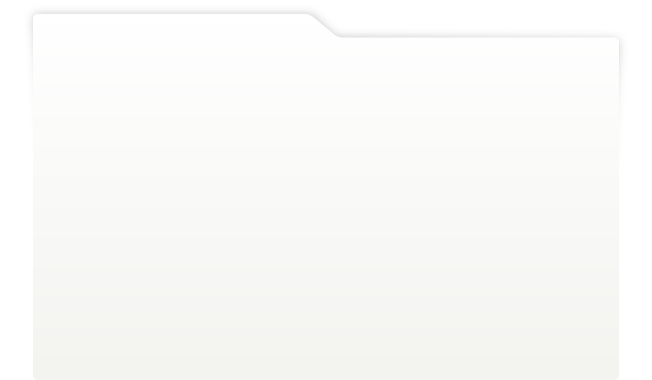
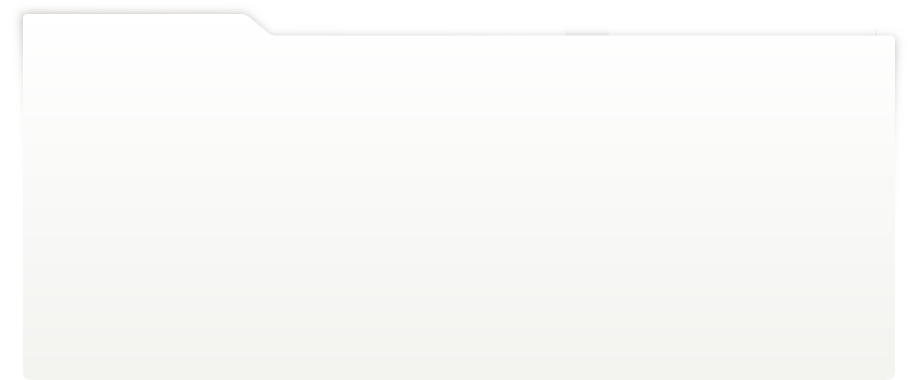
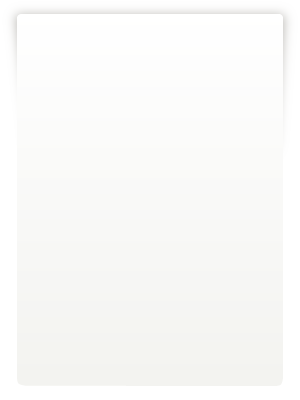
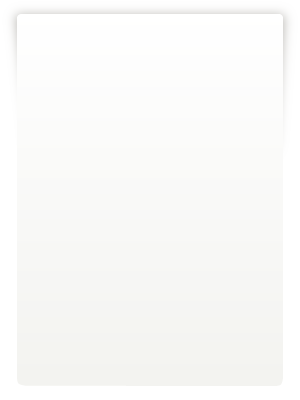
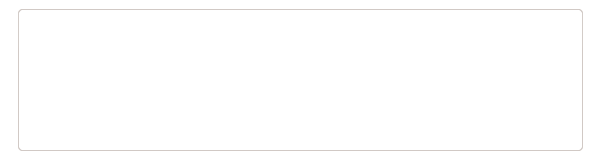
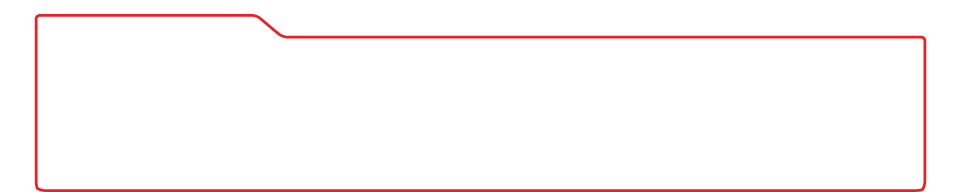
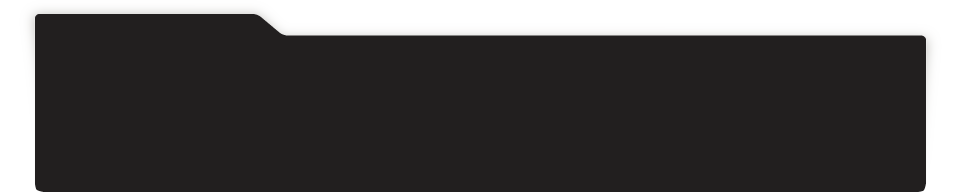
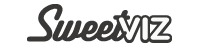
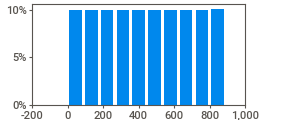
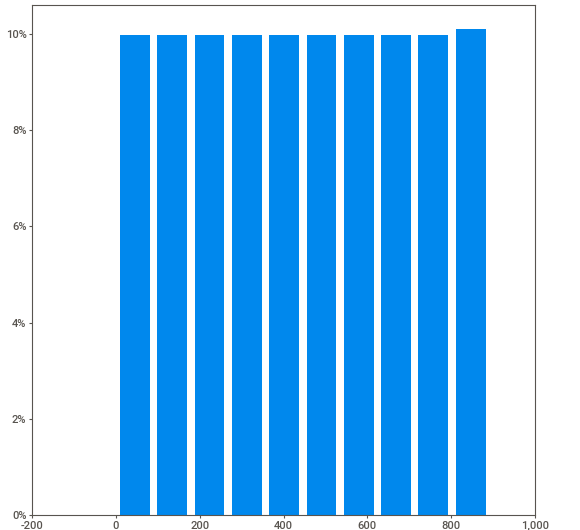
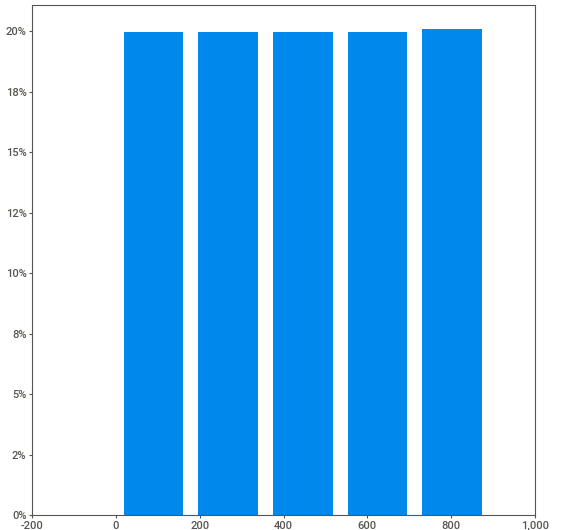
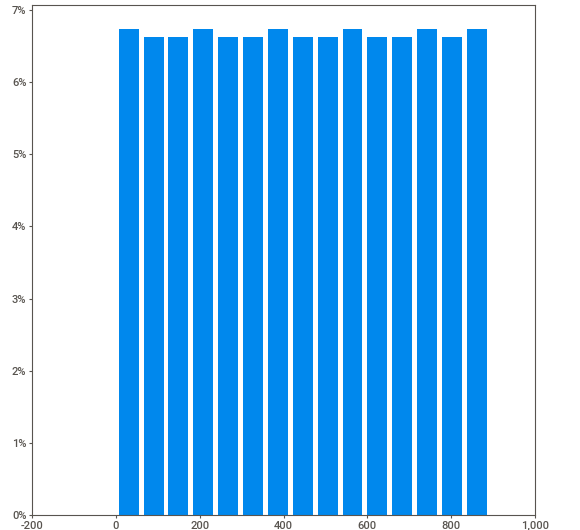
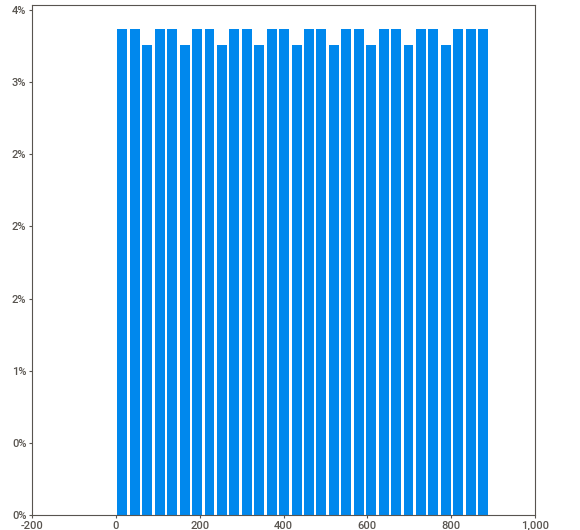
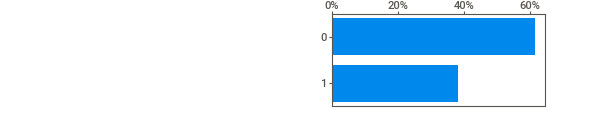
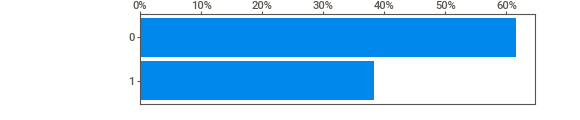
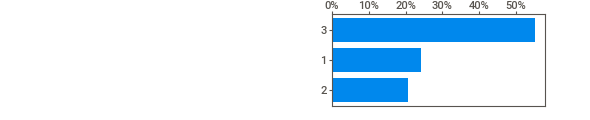
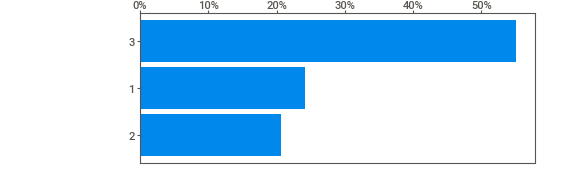
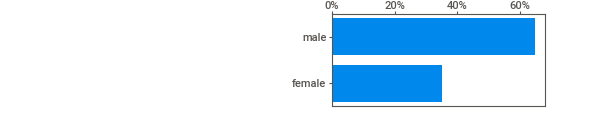
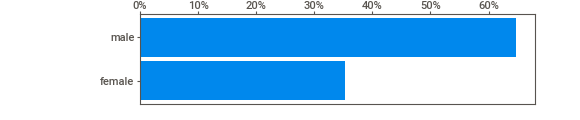
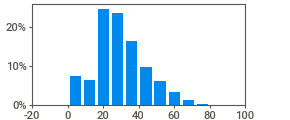
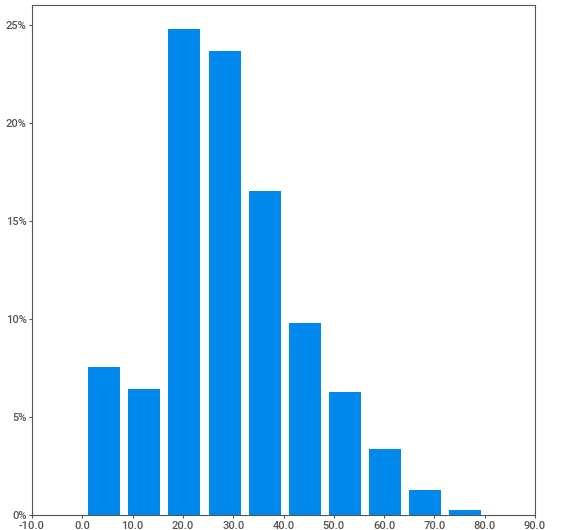
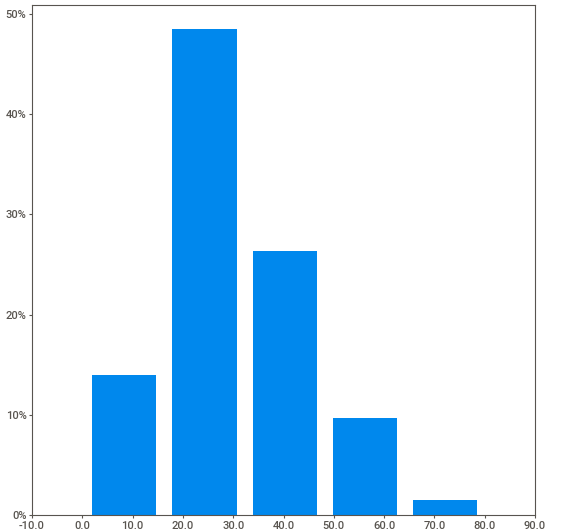
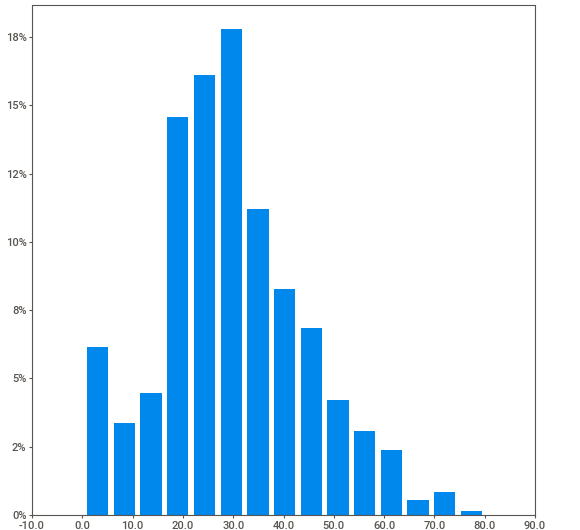
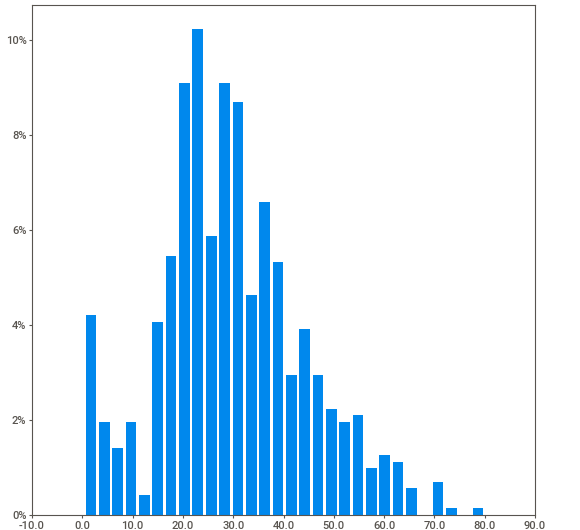
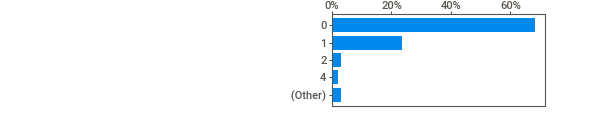
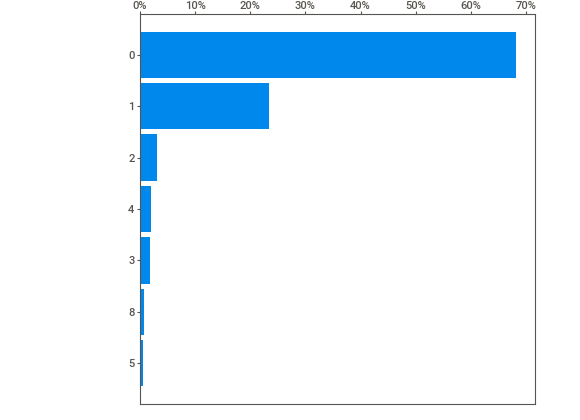
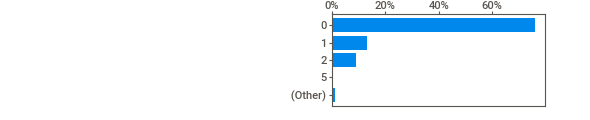
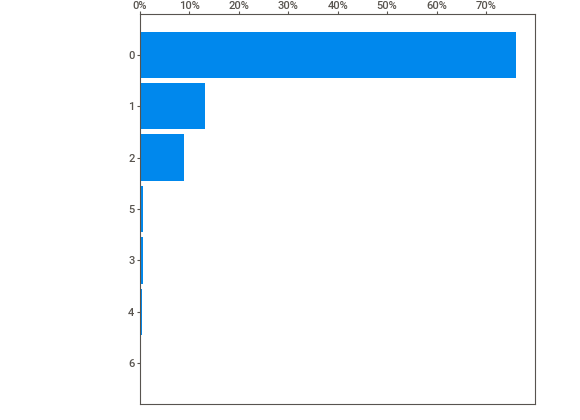
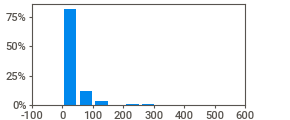
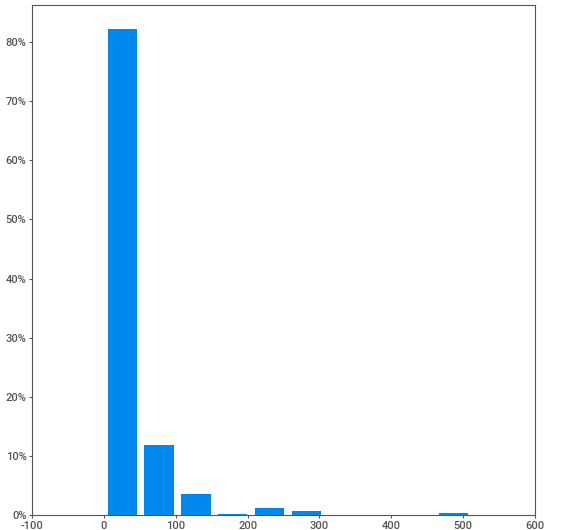
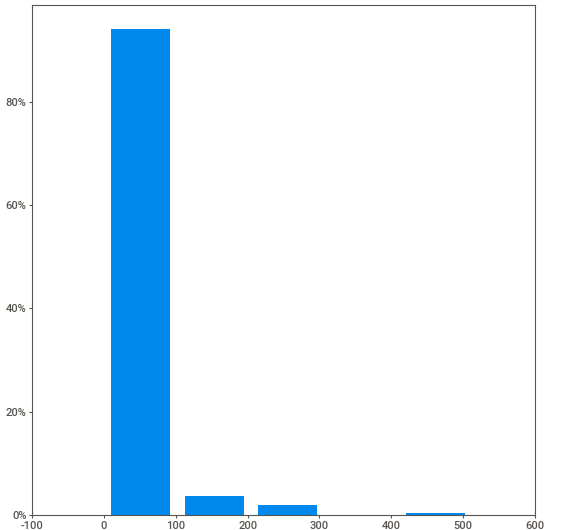
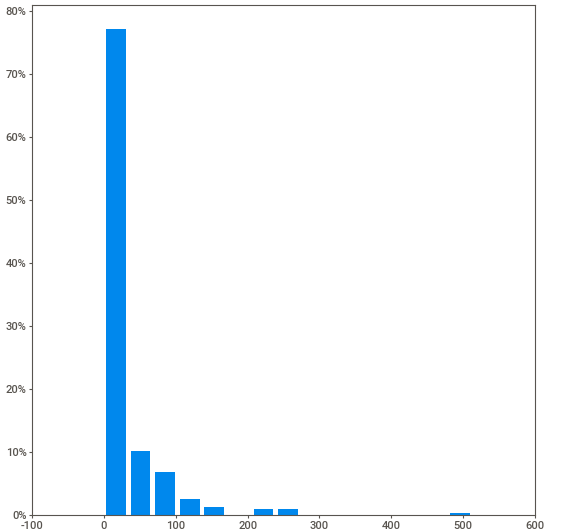
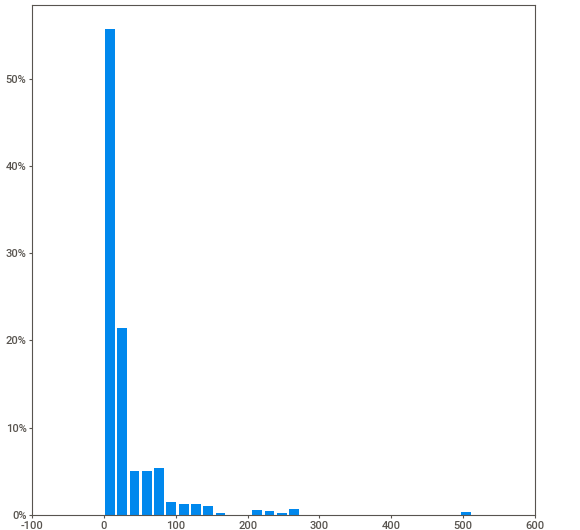
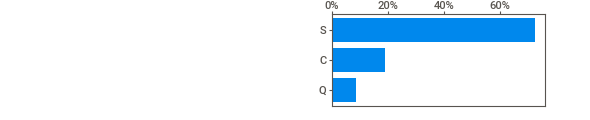
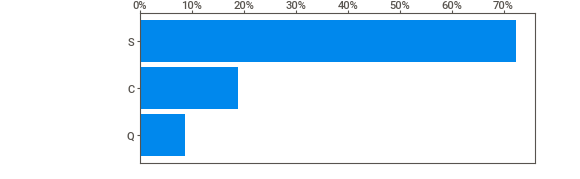
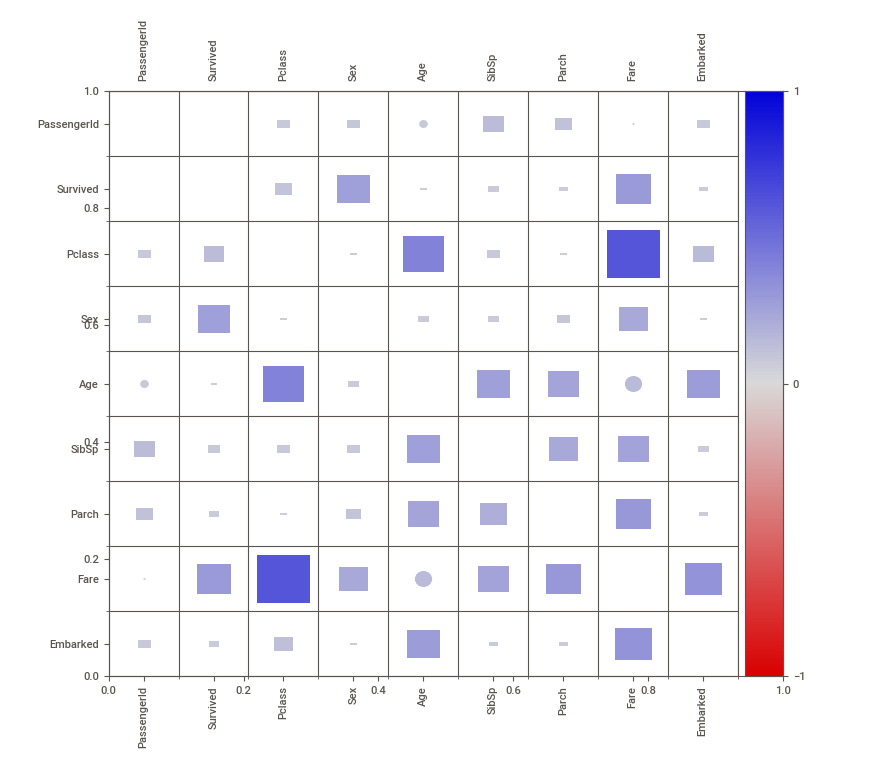
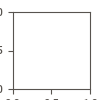

In [9]:
my_report.show_notebook()